# Phân vùng theo region (Watershed)
Sử dụng thuật toán watershed để phân vùng ảnh dựa trên các đặc trưng vùng.

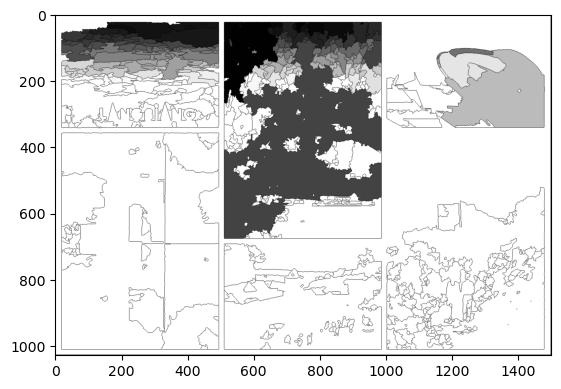

In [2]:
# Phân vùng theo region

import cv2 
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
data = cv2.imread('exercise/dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Thực hiện phép co (erosion) để loại bỏ nhiễu nhỏ
b2 = cv2.erode(b1, None, iterations=2)

# Tính khoảng cách biến đổi (distance transform)
dist_trans = cv2.distanceTransform(b2, 2, 3)

# Phân ngưỡng ảnh distance transform để lấy vùng foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)


# Hiển thị kết quả
plt.imshow(b)
plt.show()